## Import Librarries

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf 
from tensorflow import keras 

import warnings
warnings.filterwarnings('ignore')

-------------------------------
## Read Data 

In [2]:
df = pd.read_csv("train.csv")

----------------
## Information About Data

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


-----------------------------
## Visualizing Some Digits

In [6]:
digits = []
for i in range(10) :
    digit =df[ df['label'] == i].sample().iloc[:,1:].values
    digits.append(digit)

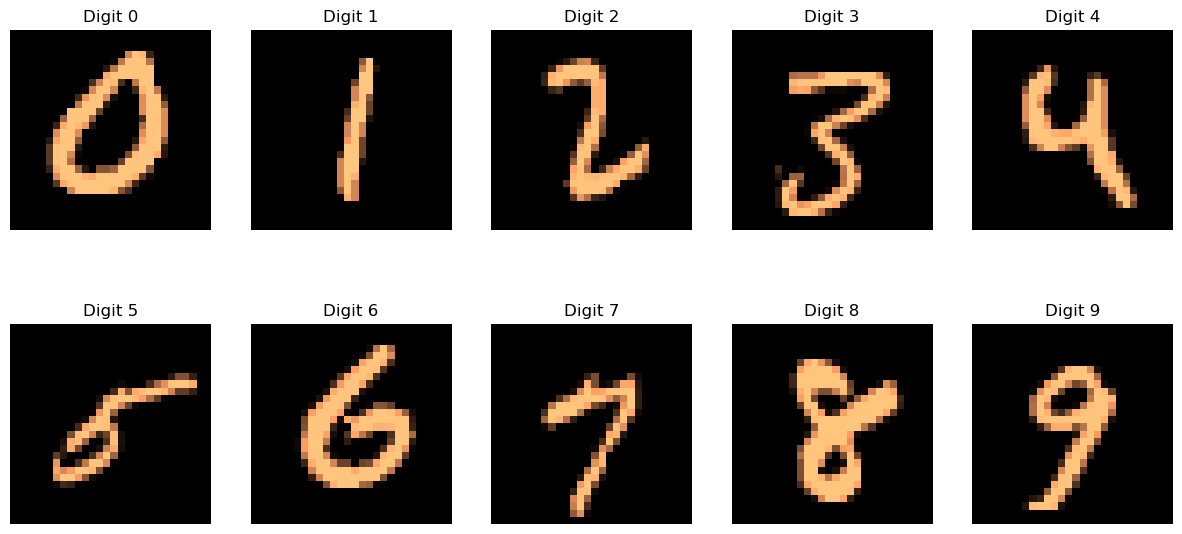

In [7]:
plt.figure(figsize =(15,7))
plt.title("Digits")
for i in range(10):
    digit = np.array(digits[i]).reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(digit , cmap='copper')
    plt.axis('off')
    plt.title(f"Digit {i}")

-----------------------
## Split Data [Features - Targert]

In [8]:
x = df.iloc[:,1:]
y = df.label

----------------
## Split data [Train - Test]

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2 , random_state=123 , shuffle=True)

------------------------
## Build Neural Network

In [76]:
model = keras.Sequential([

    keras.layers.Rescaling(1/255),
    
    keras.layers.Dense(128 , input_shape = (784,) , activation = 'relu'),
    keras.layers.Dense(64 , activation = 'relu'),
    keras.layers.Dense(64 , activation = 'relu'),
    keras.layers.Dense(64 , activation = 'relu'),
    keras.layers.Dense(32 , activation = 'relu'),
    keras.layers.Dense(32 , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'softmax')
])



In [77]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = 'adam',
    metrics = 'accuracy'
)

---------------------
## Train The Model

In [78]:
history = model.fit(x_train , y_train , epochs=20)

Epoch 1/20
1050/1050 [==============================] - 7s 5ms/step - loss: 0.3986 - accuracy: 0.8774
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1471 - accuracy: 0.9567
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1030 - accuracy: 0.9693
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0810 - accuracy: 0.9753
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0678 - accuracy: 0.9794
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0552 - accuracy: 0.9824
Epoch 7/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0520 - accuracy: 0.9845
Epoch 8/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0437 - accuracy: 0.9864
Epoch 9/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0356 - accuracy: 0.9893
Epoch 10/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.037

----------------
## Model Evaluation

In [82]:
model.evaluate(x_test,y_test)

263/263 [==============================] - 1s 3ms/step - loss: 0.1221 - accuracy: 0.9749


[0.12212524563074112, 0.9748809337615967]

In [83]:
y_pred = model.predict(x_test)
y_pred = list(map(lambda x : x.argmax() , y_pred))

263/263 [==============================] - 1s 3ms/step


In [84]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       785
           1       0.99      0.99      0.99       949
           2       0.95      0.98      0.97       838
           3       0.97      0.97      0.97       858
           4       0.98      0.97      0.98       796
           5       0.97      0.97      0.97       800
           6       0.99      0.98      0.98       870
           7       0.98      0.97      0.98       860
           8       0.96      0.97      0.97       817
           9       0.97      0.97      0.97       827

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



### -> As we see , we got 97% accuracy which is a good performance .